<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center> 


<a id='home'></a>

<a target="_blank" href="https://colab.research.google.com/github/CienciaDeDatosEspacial/code_and_data/blob/main/Rescaling.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

_____


# Rescaling


In [1]:
import os, pandas as pd
fragcia=pd.read_csv(os.path.join("data","FragilityCia_isos.csv"))
fragcia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            171 non-null    object 
 1   Officialstatename  171 non-null    object 
 2   InternetccTLD      170 non-null    object 
 3   iso2               170 non-null    object 
 4   iso3               171 non-null    object 
 5   fragility_date     171 non-null    int64  
 6   fragility          171 non-null    float64
 7   co2                171 non-null    float64
 8   co2_date           171 non-null    int64  
 9   region             171 non-null    object 
 10  ForestRev_gdp      171 non-null    float64
 11  ForestRev_date     171 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 16.2+ KB


In [2]:
# sum of cases by estado
fragcia.groupby('region')[['fragility','co2','ForestRev_gdp']].agg('mean')

,fragility,co2,ForestRev_gdp
region,,,
AFRICA,85.664706,1.670835e+07,3.239804
AUSTRALIA AND OCEANIA,55.100000,7.679500e+07,3.630000
CENTRAL AMERICA AND THE CARIBBEAN,62.993750,1.104856e+07,0.359375
CENTRAL ASIA,72.883333,3.898807e+08,0.236667
EAST AND SOUTHEAST ASIA,66.006250,9.027721e+08,0.655625
EUROPE,40.348718,9.866674e+07,0.199231
MIDDLE EAST,71.440000,1.648610e+08,0.034667
NORTH AMERICA,42.566667,2.073395e+09,0.073333
SOUTH AMERICA,61.436364,8.613718e+07,1.064545


In [3]:
# more complex
fragciaAGG=fragcia.groupby('region')[['fragility','co2','ForestRev_gdp']].agg(['min','max'],)

fragciaAGG

fragility                 co2                \
                                        min    max          min           max   
region                                                                          
AFRICA                                 38.9  112.2     173000.0  2.351370e+08   
AUSTRALIA AND OCEANIA                  19.7   81.9     177000.0  4.178700e+08   
CENTRAL AMERICA AND THE CARIBBEAN      42.0   99.3     316000.0  3.965200e+07   
CENTRAL ASIA                           61.6   77.7    7643000.0  1.848070e+09   
EAST AND SOUTHEAST ASIA                28.1   94.3     538000.0  1.077325e+10   
EUROPE                                 16.9   71.3    2447000.0  7.268810e+08   
MIDDLE EAST                            40.1  113.5    6354000.0  6.460380e+08   
NORTH AMERICA                          20.0   69.7  463739000.0  5.144361e+09   
SOUTH AMERICA                          34.0   75.7    2372000.0  4.566700e+08   
SOUTH ASIA                             69.8  105.0     934000.0  2.314738e+09   

                                  ForestRev_gdp         
                                            min    max  
region                                                  
AFRICA                                     0.00  13.27  
AUSTRALIA AND OCEANIA                      0.02  20.27  
CENTRAL AMERICA AND THE CARIBBEAN          0.00   1.26  
CENTRAL ASIA                               0.00   1.12  
EAST AND SOUTHEAST ASIA                    0.00   2.08  
EUROPE                                     0.00   1.02  
MIDDLE EAST                                0.00   0.28  
NORTH AMERICA                              0.04   0.10  
SOUTH AMERICA                              0.09   4.56  
SOUTH ASIA                                 0.00   1.89

Notice that we have multi-index in the columns

In [4]:
fragciaAGG.columns

MultiIndex([(    'fragility', 'min'),
            (    'fragility', 'max'),
            (          'co2', 'min'),
            (          'co2', 'max'),
            ('ForestRev_gdp', 'min'),
            ('ForestRev_gdp', 'max')],
           )

Even though pandas can work well, when exporting files to another application, you may prefer just simple indexes. So, let me show you how to **flat** the indexes:

In [5]:
fragciaAGG.columns.to_flat_index()

Index([    ('fragility', 'min'),     ('fragility', 'max'),
                 ('co2', 'min'),           ('co2', 'max'),
       ('ForestRev_gdp', 'min'), ('ForestRev_gdp', 'max')],
      dtype='object')

Then,

In [6]:
fragciaAGG.columns=fragciaAGG.columns.to_flat_index()
fragciaAGG

,"(fragility, min)","(fragility, max)","(co2, min)","(co2, max)","(ForestRev_gdp, min)","(ForestRev_gdp, max)"
region,,,,,,
AFRICA,38.9,112.2,173000.0,2.351370e+08,0.00,13.27
AUSTRALIA AND OCEANIA,19.7,81.9,177000.0,4.178700e+08,0.02,20.27
CENTRAL AMERICA AND THE CARIBBEAN,42.0,99.3,316000.0,3.965200e+07,0.00,1.26
CENTRAL ASIA,61.6,77.7,7643000.0,1.848070e+09,0.00,1.12
EAST AND SOUTHEAST ASIA,28.1,94.3,538000.0,1.077325e+10,0.00,2.08
EUROPE,16.9,71.3,2447000.0,7.268810e+08,0.00,1.02
MIDDLE EAST,40.1,113.5,6354000.0,6.460380e+08,0.00,0.28
NORTH AMERICA,20.0,69.7,463739000.0,5.144361e+09,0.04,0.10
SOUTH AMERICA,34.0,75.7,2372000.0,4.566700e+08,0.09,4.56


Now you have tuples as column names!... we solve it like this:

In [7]:
['_'.join(col) for col in fragciaAGG.columns]

['fragility_min',
 'fragility_max',
 'co2_min',
 'co2_max',
 'ForestRev_gdp_min',
 'ForestRev_gdp_max']

So,

In [8]:
fragciaAGG.columns=['_'.join(col) for col in fragciaAGG.columns]
fragciaAGG

,fragility_min,fragility_max,co2_min,co2_max,ForestRev_gdp_min,ForestRev_gdp_max
region,,,,,,
AFRICA,38.9,112.2,173000.0,2.351370e+08,0.00,13.27
AUSTRALIA AND OCEANIA,19.7,81.9,177000.0,4.178700e+08,0.02,20.27
CENTRAL AMERICA AND THE CARIBBEAN,42.0,99.3,316000.0,3.965200e+07,0.00,1.26
CENTRAL ASIA,61.6,77.7,7643000.0,1.848070e+09,0.00,1.12
EAST AND SOUTHEAST ASIA,28.1,94.3,538000.0,1.077325e+10,0.00,2.08
EUROPE,16.9,71.3,2447000.0,7.268810e+08,0.00,1.02
MIDDLE EAST,40.1,113.5,6354000.0,6.460380e+08,0.00,0.28
NORTH AMERICA,20.0,69.7,463739000.0,5.144361e+09,0.04,0.10
SOUTH AMERICA,34.0,75.7,2372000.0,4.566700e+08,0.09,4.56


The last step would be to have _region_ as a column, not as the row index:

In [9]:
fragciaAGG.reset_index(inplace=True) #you don't drop it!!
fragciaAGG

,region,fragility_min,fragility_max,co2_min,co2_max,ForestRev_gdp_min,ForestRev_gdp_max
0,AFRICA,38.9,112.2,173000.0,2.351370e+08,0.00,13.27
1,AUSTRALIA AND OCEANIA,19.7,81.9,177000.0,4.178700e+08,0.02,20.27
2,CENTRAL AMERICA AND THE CARIBBEAN,42.0,99.3,316000.0,3.965200e+07,0.00,1.26
3,CENTRAL ASIA,61.6,77.7,7643000.0,1.848070e+09,0.00,1.12
4,EAST AND SOUTHEAST ASIA,28.1,94.3,538000.0,1.077325e+10,0.00,2.08
5,EUROPE,16.9,71.3,2447000.0,7.268810e+08,0.00,1.02
6,MIDDLE EAST,40.1,113.5,6354000.0,6.460380e+08,0.00,0.28
7,NORTH AMERICA,20.0,69.7,463739000.0,5.144361e+09,0.04,0.10
8,SOUTH AMERICA,34.0,75.7,2372000.0,4.566700e+08,0.09,4.56
9,SOUTH ASIA,69.8,105.0,934000.0,2.314738e+09,0.00,1.89


Different columns have different value ranges. That is normal. However, some times, you need to manipulate the actual values so they have a particular scale or range. Let's see statistical summary:

In [10]:
fragcia.describe(include='all')

,Country,Officialstatename,InternetccTLD,iso2,iso3,fragility_date,fragility,co2,co2_date,region,ForestRev_gdp,ForestRev_date
count,171,171,170,170,171,171.0,171.000000,1.710000e+02,171.0,171,171.000000,171.000000
unique,171,171,170,170,171,NaN,NaN,NaN,NaN,10,NaN,NaN
top,AFGHANISTAN,The Islamic Republic of Afghanistan,.af,AF,AFG,NaN,NaN,NaN,NaN,AFRICA,NaN,NaN
freq,1,1,1,1,1,NaN,NaN,NaN,NaN,51,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2019.0,66.206433,2.012250e+08,2019.0,NaN,1.332222,2017.959064
std,NaN,NaN,NaN,NaN,NaN,0.0,23.836492,9.400228e+08,0.0,NaN,2.616312,0.294193
min,NaN,NaN,NaN,NaN,NaN,2019.0,16.900000,1.730000e+05,2019.0,NaN,0.000000,2015.000000
25%,NaN,NaN,NaN,NaN,NaN,2019.0,48.400000,4.331000e+06,2019.0,NaN,0.045000,2018.000000
50%,NaN,NaN,NaN,NaN,NaN,2019.0,70.400000,1.647800e+07,2019.0,NaN,0.260000,2018.000000
75%,NaN,NaN,NaN,NaN,NaN,2019.0,83.600000,8.467000e+07,2019.0,NaN,1.485000,2018.000000


The **describe** will only show numerical stats by default, so you need the parameter _include_ set to *all*. However, for our case, we should just request the range:

In [11]:
fragcia.describe().loc[['min','max']].T # notice the transposing:

,min,max
fragility_date,2019.0,2.019000e+03
fragility,16.9,1.135000e+02
co2,173000.0,1.077325e+10
co2_date,2019.0,2.019000e+03
ForestRev_gdp,0.0,2.027000e+01
ForestRev_date,2015.0,2.018000e+03


A boxplot may also be helpful:

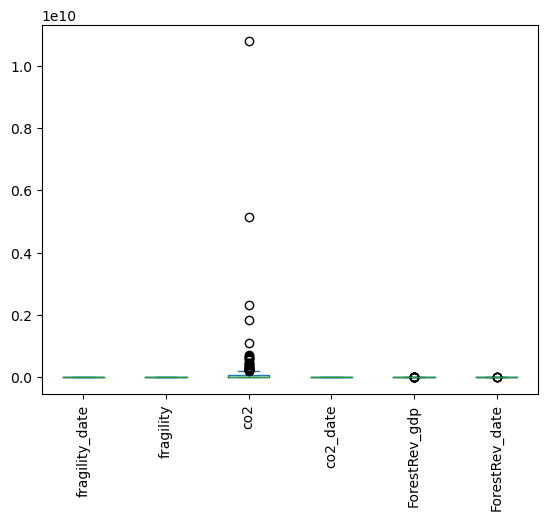

In [12]:
import matplotlib.pyplot as plt

fragcia.plot(kind='box', rot=90);

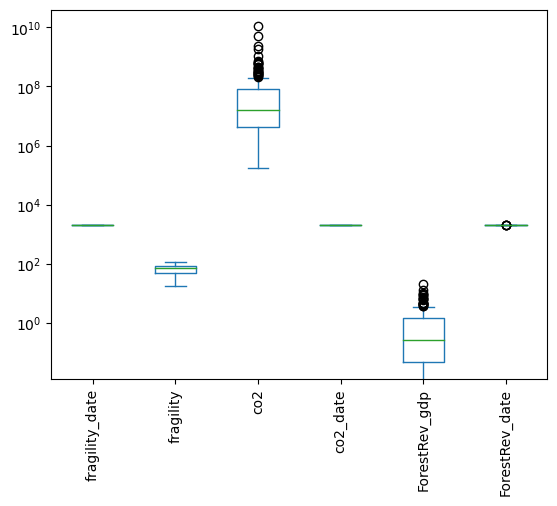

In [13]:
#alternatively

fragcia.plot(kind='box', rot=90)
plt.semilogy();

As you see above, the ranges are very different (except the years).  Let's do some re scaling.

## Min-Max Scaling

In [14]:
columnsToScale=['fragility','co2','ForestRev_gdp'] 

from sklearn import preprocessing #installed?

# prepare the process
mnMx_Scaler = preprocessing.MinMaxScaler(feature_range=(0, 10))# default is 0,1

# apply process
mnMx_Result = mnMx_Scaler.fit_transform(fragcia[columnsToScale])

# result
mnMx_Result

array([[9.12008282e+00, 7.16601342e-03, 9.86679822e-02],
       [4.34782609e+00, 3.36115733e-03, 8.88011840e-02],
       [6.05590062e+00, 1.40591243e-01, 4.93339911e-02],
       [7.33954451e+00, 1.78119989e-02, 1.77602368e-01],
       [3.88198758e+00, 5.16101484e-04, 0.00000000e+00],
       [3.01242236e+00, 1.79180039e-01, 4.44005920e-02],
       [5.15527950e+00, 5.73745193e-03, 1.38135175e-01],
       [2.89855072e-01, 3.87723097e-01, 6.41341885e-02],
       [8.38509317e-01, 6.06762693e-02, 3.45337938e-02],
       [5.82815735e+00, 3.26889027e-02, 9.86679822e-03],
       [3.30227743e+00, 3.53752294e-03, 4.93339911e-03],
       [4.85507246e+00, 3.98577008e-02, 0.00000000e+00],
       [7.32919255e+00, 8.91175454e-02, 3.94671929e-02],
       [3.21946170e+00, 1.42020732e-03, 4.93339911e-03],
       [5.31055901e+00, 5.06095056e-02, 5.03206709e-01],
       [1.21118012e+00, 1.18883420e-01, 9.86679822e-03],
       [4.72049689e+00, 3.41592349e-04, 1.52935372e-01],
       [5.86956522e+00, 6.24705

## Standard Scaling

In thi case, we will turn the data unitless. Their mean will be 0 and their standard deviation will be one:

In [15]:
# prepare the process
std_Scaler = preprocessing.StandardScaler()

# apply process
std_Result = std_Scaler.fit_transform(fragcia[columnsToScale])

# result
std_Result

array([[ 1.63226611e+00, -2.06271322e-01, -4.34026043e-01],
       [-3.07423199e-01, -2.10644660e-01, -4.41692843e-01],
       [ 3.86825685e-01, -5.29110602e-02, -4.72360041e-01],
       [ 9.08564241e-01, -1.94034722e-01, -3.72691646e-01],
       [-4.96763804e-01, -2.13914795e-01, -5.10694039e-01],
       [-8.50199599e-01, -8.55672059e-03, -4.76193441e-01],
       [ 2.07671826e-02, -2.07913324e-01, -4.03358845e-01],
       [-1.95679024e+00,  2.31144706e-01, -4.60859841e-01],
       [-1.73378909e+00, -1.44766111e-01, -4.83860240e-01],
       [ 2.94259167e-01, -1.76935063e-01, -5.03027239e-01],
       [-7.32387667e-01, -2.10441944e-01, -5.06860639e-01],
       [-1.01252318e-01, -1.68695177e-01, -5.10694039e-01],
       [ 9.04356672e-01, -1.12075430e-01, -4.80026840e-01],
       [-7.66048219e-01, -2.12875607e-01, -5.06860639e-01],
       [ 8.38807176e-02, -1.56336947e-01, -1.19687260e-01],
       [-1.58231660e+00, -7.78622434e-02, -5.03027239e-01],
       [-1.55950715e-01, -2.14115378e-01

You just got:

In [16]:
type(mnMx_Result), type(std_Result)

(numpy.ndarray, numpy.ndarray)

Let's prepare the new columns:

In [17]:
newNames_mM=[name+'_mM' for name in columnsToScale]
newNames_sd=[name+'_sd' for name in columnsToScale]
newNames_mM,newNames_sd

(['fragility_mM', 'co2_mM', 'ForestRev_gdp_mM'],
 ['fragility_sd', 'co2_sd', 'ForestRev_gdp_sd'])

Let me use that array to replace my values in the pandas _Series_:

In [18]:
mMDF=pd.DataFrame(mnMx_Result,columns=newNames_mM)
stDF=pd.DataFrame(std_Result,columns=newNames_sd)

In [19]:
fragcia=pd.concat([fragcia,mMDF,stDF],axis=1)

fragcia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            171 non-null    object 
 1   Officialstatename  171 non-null    object 
 2   InternetccTLD      170 non-null    object 
 3   iso2               170 non-null    object 
 4   iso3               171 non-null    object 
 5   fragility_date     171 non-null    int64  
 6   fragility          171 non-null    float64
 7   co2                171 non-null    float64
 8   co2_date           171 non-null    int64  
 9   region             171 non-null    object 
 10  ForestRev_gdp      171 non-null    float64
 11  ForestRev_date     171 non-null    int64  
 12  fragility_mM       171 non-null    float64
 13  co2_mM             171 non-null    float64
 14  ForestRev_gdp_mM   171 non-null    float64
 15  fragility_sd       171 non-null    float64
 16  co2_sd             171 non

Now, these are my new data values:

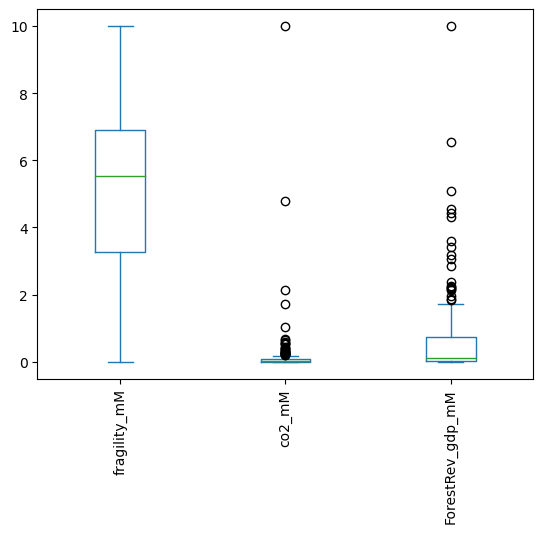

In [20]:
fragcia[newNames_mM].plot(kind='box', rot=90);

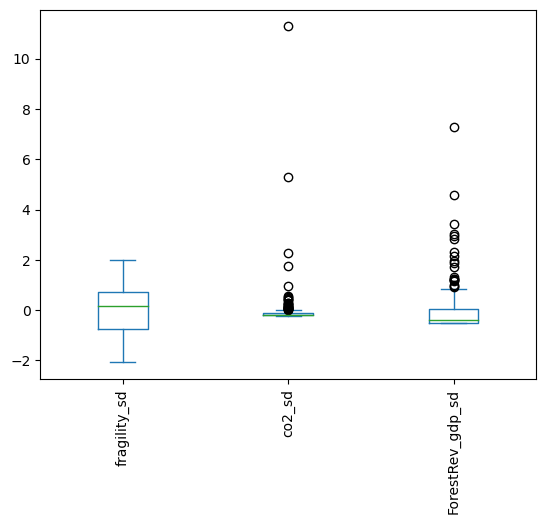

In [21]:
fragcia[newNames_sd].plot(kind='box', rot=90);

The data is ready to further use.